# G.G, Good Game! Investigating the Structural Characteristics that Make Highly-Rated Video Games

# Notebook 3 - Pre-Processing


&nbsp;

**By: [Lae Rivera](https://github.com/laerivera)**

**BrainStation Data Science**

**April 4, 2022**

In this notebook, I will be continuing various cleaning methods to ensure the data fitted in my models are of good quality. I will be modifying columns, adding features, and preparing the data for the implementation of Natural Language Processing (NLP) and Machine Learning techniques.


***

## Notebook Contents

1. [**Binarize Columns**](#c1)<br>
    1.1 [Binarize Meta Score](#c1.1)<br>
    1.2 [Binarize User Review](#c1.2)<br>
2. [**Adding Feature: Game of the Year**](#c2)<br>
3. [**Cleaning Summary**](#c3)<br>
    3.1 [Remove Brackets](#c3.1)<br>
4. [**NLP Preparations**](#c4)<br>

***

**Importing Libraries**

In [1]:
# Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


**Loading Data**

In [2]:
games_df = joblib.load('data/games_df.pkl')

***

Now I want to create a final clean dataset to be vectorizerd, split and further prepared for analysis.

**Objectives:**
- Numericize 'meta_score', 'user_review'
- Create a 'Game of the Year' feature
- Clean 'summary' column to prepare for vectorizing

***

**List of Columns**

In [3]:
the_list_of_columns = list(games_df.columns)
the_list_of_columns

['name',
 'platform',
 'summary',
 'meta_score',
 'user_review',
 'release_year',
 'release_month']

This list will be my guide and reference to keep track of the columns while I process the data.

***

In [4]:
# Create copy to conserve original dataframe

games_clean = games_df.copy()

In [5]:
games_clean.head()

,name,platform,summary,meta_score,user_review,release_year,release_month
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,1998,11
1,Tony Hawk's Pro Skater 2,PlayStation,As most major publishers' development efforts ...,98,7.4,2000,9
2,Grand Theft Auto IV,PlayStation 3,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,2008,4
3,SoulCalibur,Dreamcast,"This is a tale of souls and swords, transcendi...",98,8.4,1999,9
4,Grand Theft Auto IV,Xbox 360,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,2008,4


The column looks good-- just as we left it in the previous notebook.

***

# Binarize Columns<a id="c1"></a>

For both of these columns, I want to binarize them to carry 1/0 values. Scores below the threshold set will receive a '0', which represents a "low" score while scores above the threshold will receive a '1', which represents a "high" score. I will be refering to "low/high" games synonymously as "bad/good" games.




## Binarize Meta Score <a id="c1.1"></a>

In [6]:
print("Summary Descriptive Statistics of Meta Score")
games_clean['meta_score'].describe()

Summary Descriptive Statistics of Meta Score


count    17776.000000
mean        71.027171
std         12.232221
min         20.000000
25%         64.000000
50%         73.000000
75%         80.000000
max         99.000000
Name: meta_score, dtype: float64

Looking at the summary statistics will help me decide on a threshold when I binarize Meta Score. Here I can see that the average will be a good start, however, I want to be as balanced as possible and I prefer using integers as a threshold instead of decimals (the mean is 71.02). The **median (73) will be used** as it gives me 50% of the data from both sides. I will confirm the balance of data through plotting and looking at the distribution.

In [7]:
# Encode as binary using median as threshold
games_clean["meta_score"] = np.where(games_clean["meta_score"] <73, 0, 1)

In [8]:
# Values should be a 1 or 0 
print("Distribution of Meta Score (%)")
meta_dist = round(games_clean['meta_score'].value_counts(normalize=True).sort_index()*100, 2)
meta_dist

Distribution of Meta Score (%)


0    48.81
1    51.19
Name: meta_score, dtype: float64

**Meta Score Distribution Plot**:

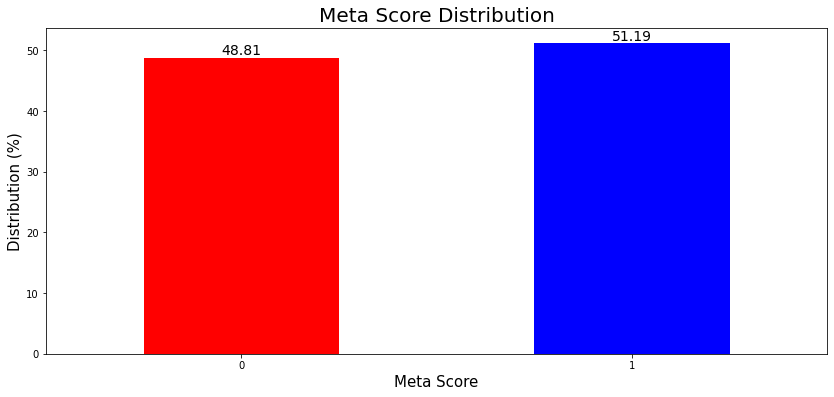

In [9]:
# Plot the distribution
plt.figure(figsize=(14, 6))
meta_dist_1 = meta_dist.plot.bar(color=['red', 'blue'])

#set labels and titles
plt.title('Meta Score Distribution', fontsize=20)
plt.xlabel('Meta Score', fontsize=15)
plt.ylabel('Distribution (%)', fontsize=15)
plt.xticks(rotation = 360)
plt.bar_label(meta_dist_1.containers[0], size=14)

plt.savefig('data/distmetascore.jpg') #save figure
plt.show()


***

## Binarize User Review <a id="c1.2"></a>

In [10]:
# Convert into integers
games_clean['user_review'] = games_clean['user_review'].astype('int')

In [11]:
print("Summary Descriptive Statistics of User Review")
games_clean['user_review'].describe()

Summary Descriptive Statistics of User Review


count    17776.000000
mean         6.534260
std          1.370395
min          0.000000
25%          6.000000
50%          7.000000
75%          7.000000
max          9.000000
Name: user_review, dtype: float64

Looking at the summary statistics will help me decide on a threshold when I binarize User Review. Here I can see that the average will be a good start, however, I want to be as balanced as possible. The **median (7) will be used** as it gives me 50% of the data from both sides, and I prefer integers instead of a decimal (6.53 mean). I will confirm the balance of data through plotting and looking at the distribution.

In [12]:
# Encode as binary
games_clean["user_review"] = np.where(games_clean["user_review"] <7, 0, 1)

In [13]:
# Values should be a 1 or 0 
print("Distribution of User Reviews")
user_dist = round(games_clean['user_review'].value_counts(normalize=True).sort_index()*100, 2)
user_dist

Distribution of User Reviews


0    39.28
1    60.72
Name: user_review, dtype: float64

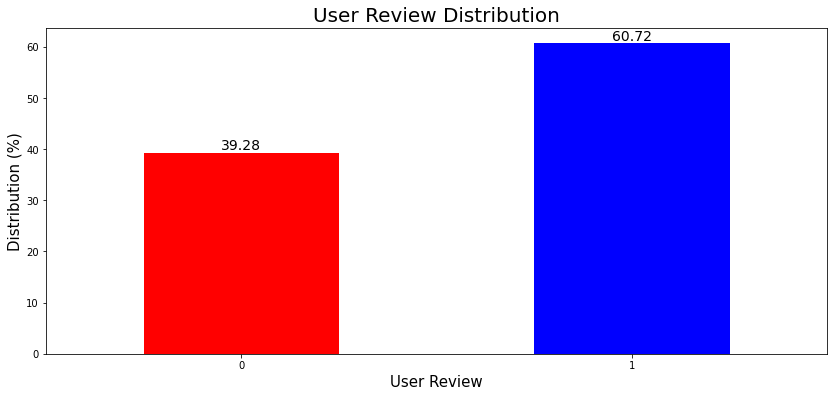

In [14]:
# Plot the distribution
plt.figure(figsize=(14, 6))
user_dist_1 = user_dist.plot.bar(color=['red', 'blue'])

#set labels and titles
plt.title('User Review Distribution', fontsize=20)
plt.xlabel('User Review', fontsize=15)
plt.ylabel('Distribution (%)', fontsize=15)
plt.xticks(rotation = 360)
plt.bar_label(user_dist_1.containers[0], size=14) 

plt.savefig('data/distuserreview.jpg')
plt.show()


Not bad in terms of distribution 60% to a 40% is still okay. I can conclude that a user_review of 7 is a great threshold set and I will keep this.

**View Changes**

In [15]:
# View changes to the data
games_clean.head()

,name,platform,summary,meta_score,user_review,release_year,release_month
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"As a young boy, Link is tricked by Ganondorf, ...",1,1,1998,11
1,Tony Hawk's Pro Skater 2,PlayStation,As most major publishers' development efforts ...,1,1,2000,9
2,Grand Theft Auto IV,PlayStation 3,[Metacritic's 2008 PS3 Game of the Year; Also ...,1,1,2008,4
3,SoulCalibur,Dreamcast,"This is a tale of souls and swords, transcendi...",1,1,1999,9
4,Grand Theft Auto IV,Xbox 360,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1,1,2008,4


As we can see, the dataframe has been updated to reflect the changes in `meta_score` and `user_review`. These columns are now in binary that denote a low/high score or review.

***

#  Adding 'Game of the Year' feature <a id="c2"></a>

Upon browsing the dataset, I noticed some game summaries were recipients of the "Metacritic's Game of The Year" award. I want to extract this information and add it as a feature. 

In [16]:
# Mapping out Game of the Year
games_clean['game_of_the_year'] = games_clean['summary'].map(lambda x: "1" if "Game of the Year" in x else "0")

What this is doing is looking for any instance of "Game of the Year" in the `summary` column corpus——the game summary will **only** have this if it is a Metacritic Game of the Year recipient——If an instance is found, then the new column created will contain the value '1'. If no instance is found, a vlaue of '0' would be returned.

In summary, a "1" in the `Game of the Year` column means that the game won that award. A "0" value will mean otherwise.

---

In [17]:
# Check distribution
print("Metacritic's Game of The Year Distribution '%'")
goty_dist = round(games_clean['game_of_the_year'].value_counts(normalize=True)*100, 2)
goty_dist

Metacritic's Game of The Year Distribution '%'


0    99.8
1     0.2
Name: game_of_the_year, dtype: float64

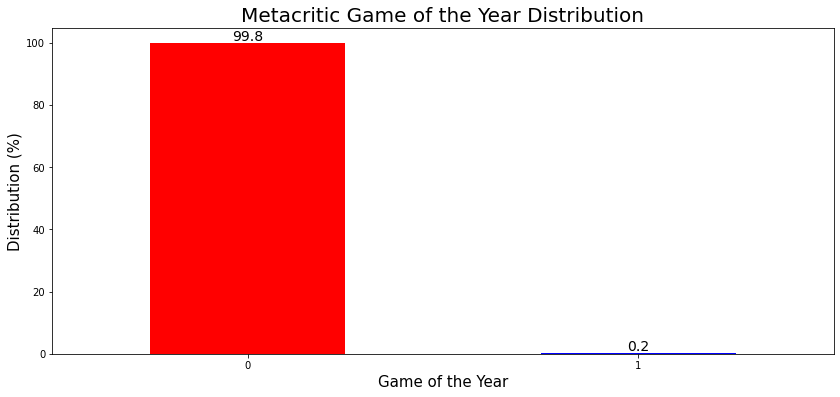

In [18]:
# Plot the distribution
plt.figure(figsize=(14, 6))
goty_dist_1 = goty_dist.plot.bar(color=['red', 'blue'])

# set labels 
plt.title('Metacritic Game of the Year Distribution', fontsize=20)
plt.xlabel('Game of the Year', fontsize=15)
plt.ylabel('Distribution (%)', fontsize=15)
plt.xticks(rotation = 360)
plt.bar_label(goty_dist_1.containers[0], size=14)

plt.savefig('data/distgoty.jpg')
plt.show()


Woah! We can see only 0.2% of games on Metacritic from 1995 to 2021 received this award. This is heavily imbalanced, but **this is expected**. Due to the abundant amount of games released in a single year, **only 1 can obtain the game of the year award, per console**. 

*Note: I plotted the Game of the Year distribution despite the obvious imbalance for consistency and easy of view for myself and others*

***

In [19]:
# View changes to the data 
games_clean.head()

,name,platform,summary,meta_score,user_review,release_year,release_month,game_of_the_year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"As a young boy, Link is tricked by Ganondorf, ...",1,1,1998,11,0
1,Tony Hawk's Pro Skater 2,PlayStation,As most major publishers' development efforts ...,1,1,2000,9,0
2,Grand Theft Auto IV,PlayStation 3,[Metacritic's 2008 PS3 Game of the Year; Also ...,1,1,2008,4,1
3,SoulCalibur,Dreamcast,"This is a tale of souls and swords, transcendi...",1,1,1999,9,0
4,Grand Theft Auto IV,Xbox 360,[Metacritic's 2008 Xbox 360 Game of the Year; ...,1,1,2008,4,1


***

# Cleaning 'Summary' <a id="c3"></a>

Before putting the summary column into the appropriate vectorizers to obtain tokens, I will first clean the data. I want to reduce the amount of errors and biases in the corpus.

**Workflow Plan**:
- Remove brackets
- Isolate the corpus
- Prepare customized NLP tokenizers
***

### Remove Brackets <a id="c3.1"></a>

Now that the Game of The Year information has been extracted and conveyed in the `game_of_the_year` column, I can remove these from the corpus, as this text would no longer be needed. Furthermore, I will be removing all kinds of brackets to clean up the data set. I decided that other text contained within the brackets are not important in predicting the metascore (ie. publisher name, previous game title, etc.).

**Below is an example of a document with brackets**:

In [20]:
games_clean['summary'][2]

'[Metacritic\'s 2008 PS3 Game of the Year; Also known as "GTA IV"] What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It\'s the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nightmare for those who don\'t. [Rockstar Games]'

In [21]:
# Removes the square/round brackets and the texts inside it
games_clean['summary'] = games_clean['summary'].str.replace(r'\[(.*?)\]','', regex=True).astype('str')
games_clean['summary'] = games_clean['summary'].str.replace(r'\((.*?)\)','', regex=True).astype('str')

**The same document without brackets**:

In [22]:
games_clean['summary'][2]

" What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nightmare for those who don't. "

**Done!**

The summary is now just a clean paragraph without any extra brackets that are redundant. All that's left is an easy-to-read paragraph.

---

In [23]:
games_clean

,name,platform,summary,meta_score,user_review,release_year,release_month,game_of_the_year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"As a young boy, Link is tricked by Ganondorf, ...",1,1,1998,11,0
1,Tony Hawk's Pro Skater 2,PlayStation,As most major publishers' development efforts ...,1,1,2000,9,0
2,Grand Theft Auto IV,PlayStation 3,What does the American Dream mean today? For ...,1,1,2008,4,1
3,SoulCalibur,Dreamcast,"This is a tale of souls and swords, transcendi...",1,1,1999,9,0
4,Grand Theft Auto IV,Xbox 360,What does the American Dream mean today? For ...,1,1,2008,4,1
...,...,...,...,...,...,...,...,...
17771,Fast & Furious: Showdown,Xbox 360,Fast & Furious: Showdown takes some of the fra...,0,0,2013,5,0
17772,Drake of the 99 Dragons,Xbox,Drake is out for revenge in a supernatural Hon...,0,0,2003,11,0
17773,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Head out on a journey of redemption, driven by...",0,0,2015,9,0
17774,Infestation: Survivor Stories (The War Z),PC,"It has been 5 years since the outbreak, givin...",0,0,2012,10,0


Future EDA ideas:

- Popular franchises
- Franchise game of the year wins
- Platform review count through the years


***

**Save Files**

In [24]:
# Save games_clean data as pickle file
joblib.dump(games_clean, 'data/games_clean.pkl')

['data/games_clean.pkl']

**Load Files**

In [25]:
# Load data
games_clean = joblib.load('data/games_clean.pkl')

***

# NLP Preparations <a id="c4"></a>

In [26]:
# Create copy to conserve original dataframe
games = games_clean.copy()

In [27]:
# Check dataframe
games.head()

,name,platform,summary,meta_score,user_review,release_year,release_month,game_of_the_year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"As a young boy, Link is tricked by Ganondorf, ...",1,1,1998,11,0
1,Tony Hawk's Pro Skater 2,PlayStation,As most major publishers' development efforts ...,1,1,2000,9,0
2,Grand Theft Auto IV,PlayStation 3,What does the American Dream mean today? For ...,1,1,2008,4,1
3,SoulCalibur,Dreamcast,"This is a tale of souls and swords, transcendi...",1,1,1999,9,0
4,Grand Theft Auto IV,Xbox 360,What does the American Dream mean today? For ...,1,1,2008,4,1


We created an exact copy of our games_clean data! It looks good.

#### Dropping Redundant Columns

My whole business value is to be able to go up to developers, publishers, and gamers and say "these characteristics of the game are important to get a *low/high* meta score". I kept all columns initially to showcase some cleaning steps and EDA that may be used in later analysis. However, I will be dropping some columns to focus on my corpus.

I am only using the summary column to keep my model simple. I will add other features later on. 

**Columns to Drop**:
- `name`: This is not useful in terms of acquiring game features. Characteristics of the game can be acquired from the summary itself. In other words, the title is spoken for through the summary column. 

- `user_review` : This is not my focus to help predict my meta score. With my meta score being my **main** predicted value, I will not use user reviews. (Possibly add later in feature engineering)

- `year` & `month`: Not important to meta score because these are past information and cannot be replicated. For example, I cannot say "to get a good metascore, release in the year 2004". This information is not helpful in the end.

- `game of the year`: This award is given after a metascore has been established, and is therefore not useful when **predicting a non-existent meta score**. (Possibly add later in feature engineering)

- `platform`: this will be dropped since I want to focus on solely the game qualities. (Possibly add later in feature engineering)


---

In [28]:
# Drop Columns
games= games.drop(columns=['name', 'user_review', 'release_year', 'release_month', 'game_of_the_year', 'platform'])

In [29]:
# View Data
games.head()

,summary,meta_score
0,"As a young boy, Link is tricked by Ganondorf, ...",1
1,As most major publishers' development efforts ...,1
2,What does the American Dream mean today? For ...,1
3,"This is a tale of souls and swords, transcendi...",1
4,What does the American Dream mean today? For ...,1


In [30]:
# Shape
print(f" Shape of `games` {games.shape}")

 Shape of `games` (17776, 2)


In [31]:
# Summary information on datatypes and nulls
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17776 entries, 0 to 17775
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   summary     17776 non-null  object
 1   meta_score  17776 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 277.9+ KB


In [32]:
# Null Count
print("Null Count")
games.isna().sum()

Null Count


summary       0
meta_score    0
dtype: int64

Since we did the cleaning before hand I just want to do a quick sanity check that there are no nulls, that the datatypes remain consistent, and the values are correct. Here, the datatypes look good!

---

**Save Files**

In [33]:
# Save games_clean data as pickle file
joblib.dump(games, 'data/games.pkl')

['data/games.pkl']

***

**Notebook Ending Remarks**

In the next notebook, I will be performing some Modeling. See Notebook *4-Modeling*.

***